**[Attribute Information](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names):**

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

In [2]:
digits.images[10]

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

In [5]:
zero = digits.images[10].copy()
type(zero)

numpy.ndarray

In [9]:
digits.data[10]

array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
       14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
       16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
        0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
       10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.])

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

C:\Users\marce\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
housing_data = datasets.load_boston()

Let's separate this into input and output. To make this independent of the ordering of the data,
let's shuffle it as well:

In [12]:
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

The random_state parameter controls how we shuffle the data so that we can have
reproducible results. Let's divide the data into training and testing. We'll allocate 80% for
training and 20% for testing:

In [13]:
num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

In [14]:
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [15]:
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
ab_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=7)

In [19]:
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt)
print( "\n#### Decision Tree performance ####")
print( "Mean squared error =", round(mse, 2))
print( "Explained variance score =", round(evs, 2))

y_pred_ab = ab_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ab)
evs = explained_variance_score(y_test, y_pred_ab)
print( "\n#### AdaBoost performance ####")
print( "Mean squared error =", round(mse, 2))
print( "Explained variance score =", round(evs, 2))


#### Decision Tree performance ####
Mean squared error = 14.79
Explained variance score = 0.82

#### AdaBoost performance ####
Mean squared error = 7.64
Explained variance score = 0.91


The error is lower and the variance score is closer to 1 when we use AdaBoost as shown in the preceding
output.

Let's plot the relative importance of the features. 

In [27]:
def plot_feature_importances(feature_importances, title, feature_names):
    # Normalize the importance values
    feature_importances = 100.0 * (feature_importances / max(feature_importances))
    # Sort the index values and flip them so that they are arranged in decreasing order of importance
    index_sorted = np.flipud(np.argsort(feature_importances))
    # Center the location of the labels on the X-axis (for display purposes only)
    pos = np.arange(index_sorted.shape[0]) + 0.5
    # Plot the bar graph
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)


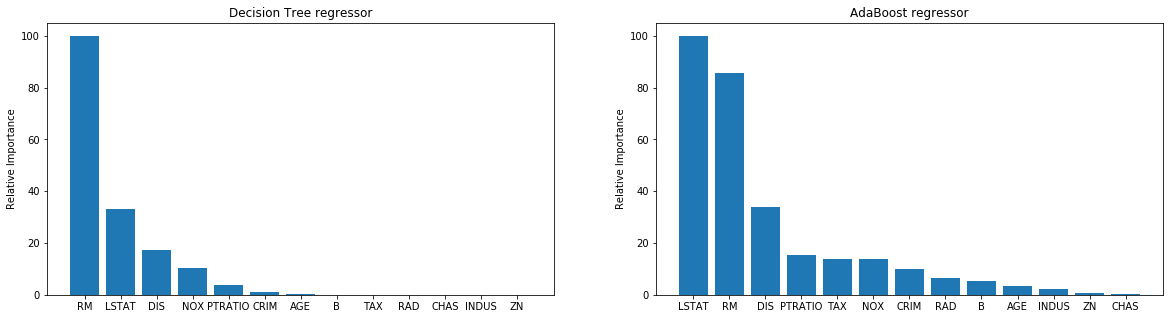

In [28]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plot_feature_importances(dt_regressor.feature_importances_, 'Decision Tree regressor', housing_data.feature_names)
ax = fig.add_subplot(122)
plot_feature_importances(ab_regressor.feature_importances_, 'AdaBoost regressor', housing_data.feature_names)
plt.show()